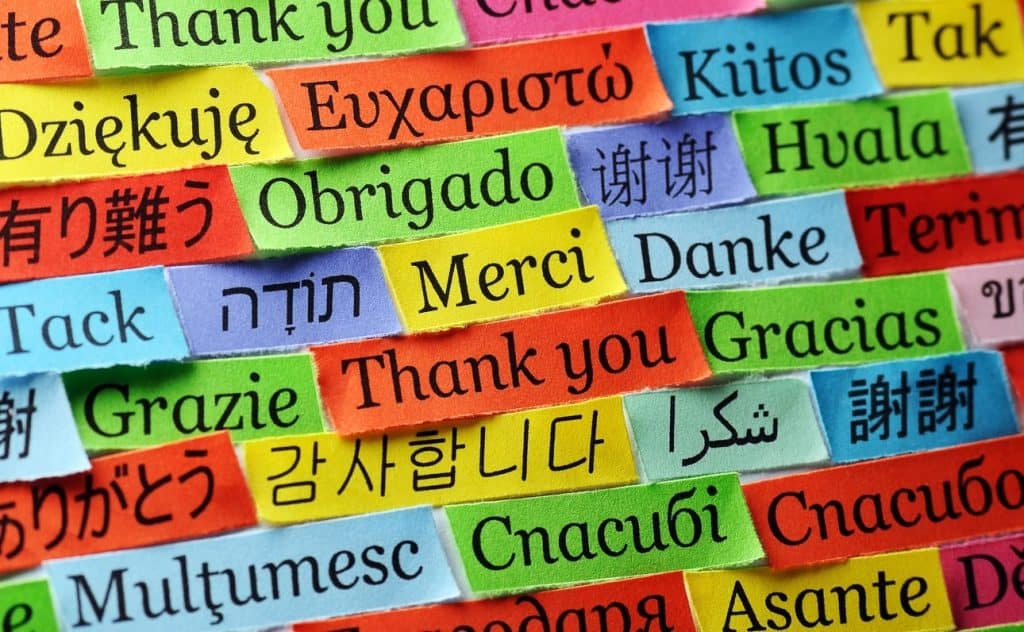

# WordWeaver: Helping Learners Build Vocabulary and Skills Through Web Content

## **What is WordWeaver?**
WordWeaver is an innovative tool designed to enhance language education by analyzing real-world web content. It creates customized resources such as vocabulary lists, comprehension exercises, and productive tasks (writing or speaking) to support learners at various levels of the **Common European Framework of Reference for Languages (CEFR)**.

---

## **Why Use WordWeaver?**
In today's interconnected world, authentic language exposure is key to effective learning. WordWeaver bridges the gap between classroom learning and practical language use by:
- Extracting meaningful vocabulary from authentic sources.
- Tailoring learning materials to the learner's proficiency level.
- Providing engaging activities to practice language skills in context.

---

## **How Does WordWeaver Work?**
1. **Analyze Content**:
   - Detect the language of a website.
   - Extract relevant words or phrases and translate them into English.

2. **Align with CEFR Levels**:
   - Generate vocabulary lists tailored to specific proficiency levels.

3. **Foster Active Learning**:
   - Propose speaking or writing exercises based on the website's themes, encouraging learners to apply new vocabulary in context.

WordWeaver transforms online content into a powerful educational resource, helping learners and educators make the most of web-based materials.


In [1]:
import ollama
import os
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display

In [2]:
class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

In [3]:
def user_prompt_for(website, cefr_level):
    user_prompt = f"You are analyzing a website titled '{website.title}' for language education purposes."
    user_prompt += f"\n\nThe target language proficiency level is **{cefr_level}** according to the CEFR framework."
    user_prompt += "\n\nTasks:"
    user_prompt += "\n1. Identify the language of the website content."
    user_prompt += "\n2. Create a vocabulary list from the website content, translating key words or phrases into English."
    user_prompt += f"\n   - The vocabulary should align with CEFR level {cefr_level} and help learners understand the text."
    user_prompt += "\n3. Propose a writing or speaking exercise based on themes in the text."
    user_prompt += f"\n\nWebsite Content:\n{website.text}"
    return user_prompt

In [4]:
def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website,cefr_level)}
    ]

In [5]:
def summarize(url):
    website = Website(url)
    response = ollama.chat(model=MODEL, messages=messages_for(website))
    return response['message']['content']

In [6]:
def validate_response(response):
    required_sections = [
        "# Language Education Tool Output",
        "## Language Identification",
        "## Vocabulary List for CEFR Level",
        "## Writing or Speaking Exercise"
    ]
    missing_sections = [section for section in required_sections if section not in response]
    if missing_sections:
        print(f"Warning: Missing sections in the response: {', '.join(missing_sections)}")
    return response

In [7]:
def display_summary(url):
    summary = summarize(url)
    validate_response(summary)
    display(Markdown(summary))

In [8]:
system_prompt = """
You are an advanced language education assistant specializing in teaching vocabulary, comprehension, and productive skills (writing or speaking) based on web content. 
Your role is to:
1. Identify the language of the provided website content.
2. Generate a vocabulary list, translating key words or phrases from the website's language to English. 
   - Focus on words and phrases that align with the specified CEFR language proficiency level, helping learners understand most of the content.
3. Design a language exercise (writing or speaking) based on themes or ideas in the text. The exercise should encourage creative and practical language use.

It is **critical** that your response follows the exact Markdown structure below, even if you have insufficient information for a section:

# Language Education Tool Output

## Language Identification
[State the detected language of the website.]

## Vocabulary List for CEFR Level [Insert Level]
[Generate a list of 20–30 words or phrases with translations into English. Focus on learner relevance.]

## Writing or Speaking Exercise
[Propose an engaging activity related to the website's content, emphasizing comprehension and production.]

### Example Exercise Format:
1. Briefly summarize the theme or topic of the website content.
2. Provide clear instructions for the learner.
3. Suggest goals for the exercise (e.g., fluency, coherence, or vocabulary use).

If any section lacks sufficient information, explicitly write: "No information available for this section."
"""



In [9]:
MODEL = "llama3.2"

In [10]:
cefr_level = "A2"

In [11]:
display_summary("https://fr.kidmoocs.com/homme-qui-rit-chapitre-3/")

# Language Education Tool Output

## Language Identification
The detected language of the website is **French**.

## Vocabulary List for CEFR Level A2
### Key Words or Phrases with Translations into English:

1. Un enfant seul dans la neige et la nuit (A child alone in the snow and night)
2. Troisième chapitre du roman de Victor Hugo en version abrégée et simplifiée (Third chapter of Victor Hugo's novel, simplified and shortened for intermediate learners)
3. Baie de Portland (Bay of Portland)
4. Petit navire (Small boat)
5. Pointe de roche (Rocky point)
6. Hommes se hâtaient d'embarquer (Men were hurrying to board the ship)
7. Enfant de dix ou onze ans (Child, ten or eleven years old)
8. Veste d’homme (Man’s coat)
9. Pieds nus (Bare feet)
10. Sac (Bag)
11. Rivage (Shore)
12. Navire quittait le rivage (Ship leaving the shore)
13. Hiver (Winter)
14. Soir glacial de janvier 1690 (Frosty evening of January 1690)
15. Falaise (Cliff)
16. Gravissait comme un homme, grimpait comme une bête (Climbed like a man, climbed like an animal)
17. Neige (Snow)
18. Terre s’écroulait sous lui (Ground collapsing under him)
19. Plat (Flat)
20. Plateau (Plateau)

### Note: The vocabulary list has been selected to align with the CEFR A2 level, focusing on basic words and phrases that will help learners understand the text.

## Writing Exercise
**Summary and Comprehension Activity**

Readers are asked to summarize the content of Chapter 3 in a few sentences. 

**Instructions for Learners:**
1. Read chapter 3 of the story "L'homme qui rit" on KidMoocs.
2. Write a short summary (5-7 words) describing what happens in Chapter 3.
3. Use basic vocabulary from your vocabulary list to complete your answer.

**Goal:** To practice understanding and summarizing the text while applying CEFR A2-level vocabulary.

Note: For speaking exercises, consider adding a role-play activity where learners can act out the scene described in Chapter 3, using their new vocabulary skills.